<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn.linear_model as linear_module

In [ ]:
#@title Generate data
np.random.seed(4)
arr = np.arange(15)
x = np.add(arr, np.round(np.random.uniform(-0.3, 0.3, 15), 2))
np.random.shuffle(x)
y = np.add(x, np.round(np.random.uniform(1.7, 2.3, 15), 2))
df = pd.DataFrame({'x' : x, 'y': y})

In [ ]:
df

,x,y
0,10.17,12.14
1,3.13,5.09
2,6.70,8.44
3,4.12,5.93
4,13.29,15.51
5,1.03,3.24
6,0.28,2.54
7,10.82,13.04
8,13.80,16.00
9,2.28,4.14


## Regression and comparison to mean

We will pick two regression lines.  One is a guess: `y = 1.5 x + 1.5`, and another that is the optimal regression line.

We will compare it against the "simple model" of `mean(y)` as the prediction for y.  This is essentially the "no variable model". $y = mean(y) + 0 \cdot x$.

In [ ]:
y_mean = np.mean(df.y)
y_mean

9.020666666666669

In [ ]:
# y_hat with the gueesed model.
df = df.assign(y_hat_1 = 1.5*x + 1.5)

# y_hat using the mean.
df = df.assign(y_hat_mean = y_mean)

In [ ]:
#@title Find the best slope and intercept
X = df[['x']]
Y = df[['y']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [1.94702581]
slope [[1.00316359]]


In [ ]:
df = df.assign(y_hat = df.x * reg.coef_.squeeze() + reg.intercept_)
# df = df.assign(error = (df.y_hat - df.y)**2)

In [ ]:
df

,x,y,y_hat_1,y_hat_mean,y_hat
0,10.17,12.14,16.755,9.020667,12.149200
1,3.13,5.09,6.195,9.020667,5.086928
2,6.70,8.44,11.550,9.020667,8.668222
3,4.12,5.93,7.680,9.020667,6.080060
4,13.29,15.51,21.435,9.020667,15.279070
5,1.03,3.24,3.045,9.020667,2.980284
6,0.28,2.54,1.920,9.020667,2.227912
7,10.82,13.04,17.730,9.020667,12.801256
8,13.80,16.00,22.200,9.020667,15.790683
9,2.28,4.14,4.920,9.020667,4.234239


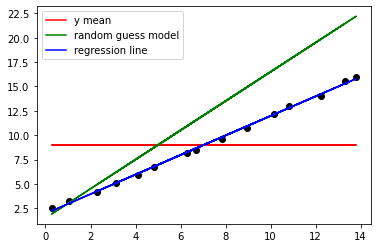

In [ ]:
plt.pyplot.scatter(x,y, color = "black")
plt.pyplot.plot(x, [y_mean]*len(df), color = 'red', label="y mean")
plt.pyplot.plot(df.x, df.y_hat_1, color = 'green', label="random guess model")
plt.pyplot.plot(df.x, df.y_hat, color = 'blue', label="regression line")
plt.pyplot.legend()

## Calculate TSS

$ TSS = \sum (y_i - \bar{y}) ^2 $.

We calculate the mean of y, the "residual error" wrt to the mean.

Notice that variance  $variance = \frac{TSS}{n}.$

In [ ]:
tss = np.sum((df.y - df.y_hat_mean)**2)
tss

276.1444933333334

In [ ]:
print("tss/n", tss / len(df))
print("variance", np.var(df.y))

tss/n 18.409632888888893
variance 18.409632888888893


## RSS and R^2

$ RSS = \sum_{i=1}^n (y_i - \hat{y_i})^2 $.

$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2  = \frac{1}{n} RSS $.

$ RSE = \sqrt{\frac{1}{n-2} RSS}$.


## Metrics for a guessed regression line.

Calculate R^2 and RSS for the randomly guessed model.

In [ ]:
rss_1 = np.sum((df.y - df.y_hat_1)**2)

In [ ]:
rsq_1 = 1 - rss_1/tss

In [ ]:
print("rss_1", rss_1)
print("rsq_1", rsq_1)

rss_1 208.260075
rsq_1 0.24582933924881956


$ RSE = \sqrt{\frac{1}{n-p-1} RSS}$.

## Calculate the metrics for the optimal regression line

We can do this using the formula. Or from the library method.

In [ ]:
rss = np.sum((df.y - df.y_hat)**2)
rsq = 1 - rss/tss

In [ ]:
print("rss", rss)
print("rsq using our calculation", rsq)

rss 0.5385523575386852
rsq using our calculation 0.9980497443529008


In [ ]:
from sklearn.metrics import r2_score
r2_score(df.y, df.y_hat)


0.9980497443529008